<a href="https://colab.research.google.com/github/shayesteh73/shayesteh73/blob/main/Basketball_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Business Understnding

Qestion 1: What kind of players we have in the Tournament?

Solving the project by the CRISP-DM process

Section 2: Data Understanding

Connecting Google Drive to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Reading data from Google Drive

In [3]:
game_stats = pd.read_csv("/content/drive/MyDrive/averages.csv")
players = pd.read_csv("/content/drive/MyDrive/players.csv")

View the Information of the Dataset 1







In [4]:
players.head()

,Id,SN,Player Name,POS,Height,Nationality
0,P_142950,7,Aren Davoudichegani,PG,186,IRI
1,P_142957,15,Hamed EHaddadi,C,218,IRI
2,P_152307,22,Nick Fazekas,C,207,JPN
3,P_152309,12,CJ Giles,C,211,BRN
4,P_152335,8,Saeid Davarpanah,SF,190,IRI


View the Information of the Dataset 2


In [5]:
game_stats.head()

,Id,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_239228,16.30000,12.5,4.0,9.00,37.50000,2.000,4.50,46.43000,2.000,...,142.21000,72.91500,58.33500,35.71500,0.52000,3.5000,0.08500,2.630,4.5000,20.19000
1,P_215434,19.96000,11.0,4.0,8.75,40.96875,2.125,5.75,30.95125,1.875,...,106.33625,48.33500,53.48375,8.95125,0.12125,0.7500,0.10000,2.440,6.5825,17.31875
2,P_265287,12.43500,2.5,1.0,4.50,25.00000,0.000,1.00,0.00000,1.000,...,60.57500,0.00000,25.00000,12.50000,0.09500,0.5000,0.21000,2.325,6.2500,17.48500
3,P_205891,18.19000,12.0,5.5,8.00,65.00000,0.500,0.50,50.00000,5.000,...,141.63500,50.00000,65.91000,5.00000,0.29500,1.5000,0.07500,6.430,8.2500,13.82000
4,P_209340,24.16625,12.0,4.5,8.75,49.79375,1.000,3.25,28.95750,3.500,...,136.10750,44.47875,59.41500,22.35625,0.50250,4.5625,0.10625,8.185,10.9425,17.67875


Analyze Data

In [6]:
# Checking Number of Rows and Columns

players.shape

(403, 6)

In [7]:
# Checking Number of Rows and Columns

game_stats.shape

(416, 45)

In [8]:
# Checking Null values in Players Dataset

players.isna().sum()

Id             0
SN             0
Player Name    0
POS            0
Height         0
Nationality    0
dtype: int64

In [9]:
# checking Null values in Game_Stats

game_stats.isna().sum()

Id             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
2PM            0
2PA            0
2P%            0
FTM            0
FTA            0
FT%            0
DR             0
OR             0
TR             0
AST            0
TO             0
STL            0
BLK            0
TPF            0
TPFD           0
TSFD           0
MidRangePTS    0
MidRangeM      0
MidRangeA      0
MidRange%      0
PaintPTS       0
PaintM         0
PaintA         0
Paint%         0
Floor%         0
DRtg           0
ORtg           0
eFG%           0
TS%            0
FT Rate        0
AST Rate       0
AST/TO         0
TOV Rate       0
ORB%           0
DRB%           0
USG%           0
dtype: int64

In [10]:
# Checking  for Duplicates in Game_Stats

game_stats['Id'].duplicated().sum()

13

In [11]:
# Checking for Duplicates in Players Dataset

players['Id'].duplicated().sum()

0

In [12]:
# Taking a Closer Look at duplicated rows in Game _Stats

duplicates = game_stats[game_stats['Id'].duplicated()]
game_stats.loc[game_stats['Id'].isin(duplicates.Id)].sort_values('Id')

,Id,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
144,P_152309,28.660000,9.500000,3.000000,6.000000,48.570000,0.000000,0.000000,0.000000,3.000000,...,89.320000,16.665000,59.125000,61.430000,0.120000,0.375000,0.330000,7.105000,21.600000,18.040000
123,P_152309,38.600000,15.000000,7.000000,12.000000,58.330000,1.000000,2.000000,50.000000,6.000000,...,118.160000,50.000000,62.500000,0.000000,0.190000,2.000000,0.090000,0.000000,30.770000,13.980000
308,P_152341,6.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.680000,0.000000,0.000000,0.000000,0.810000,1.000000,0.810000,0.000000,2.500000,16.280000
315,P_152341,13.130000,2.000000,1.000000,3.000000,33.330000,0.000000,0.000000,0.000000,1.000000,...,50.580000,0.000000,33.330000,0.000000,0.230000,0.500000,0.470000,0.000000,6.670000,15.560000
54,P_173563,30.647778,15.666667,5.777778,13.888889,37.084444,0.555556,2.000000,10.476667,5.222222,...,90.046667,35.942222,42.431111,21.848889,0.326667,2.852222,0.174444,1.396667,4.308889,21.213333
128,P_173563,30.840000,18.500000,7.000000,16.500000,42.645000,1.500000,3.000000,30.000000,5.500000,...,98.385000,41.095000,52.695000,18.565000,0.200000,1.165000,0.175000,1.615000,5.440000,24.450000
129,P_173564,35.785000,12.000000,4.500000,6.000000,75.000000,0.000000,0.000000,0.000000,4.500000,...,159.990000,0.000000,81.250000,50.000000,0.785000,5.000000,0.165000,17.365000,44.120000,13.415000
55,P_173564,23.894444,6.111111,2.333333,4.777778,40.396667,0.000000,0.000000,0.000000,2.333333,...,105.905556,0.000000,48.158889,30.370000,0.292222,1.777778,0.151111,8.371111,12.973333,10.434444
275,P_192465,28.553750,14.750000,6.000000,13.000000,50.021250,0.875000,2.625000,31.250000,5.125000,...,97.660000,48.611250,56.160000,14.183750,0.152500,0.541250,0.241250,5.986250,11.121250,21.746250
240,P_192465,20.145000,8.000000,3.500000,8.000000,42.065000,0.000000,1.000000,0.000000,3.500000,...,98.355000,0.000000,44.285000,11.110000,0.405000,2.665000,0.200000,6.630000,15.910000,23.375000


<Axes: >

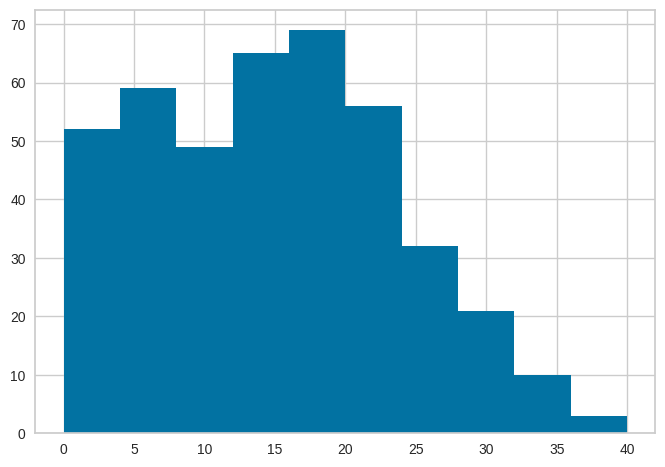

In [13]:
# Checking Players Minuts Distribution

game_stats['MIN'].hist()

<Axes: >

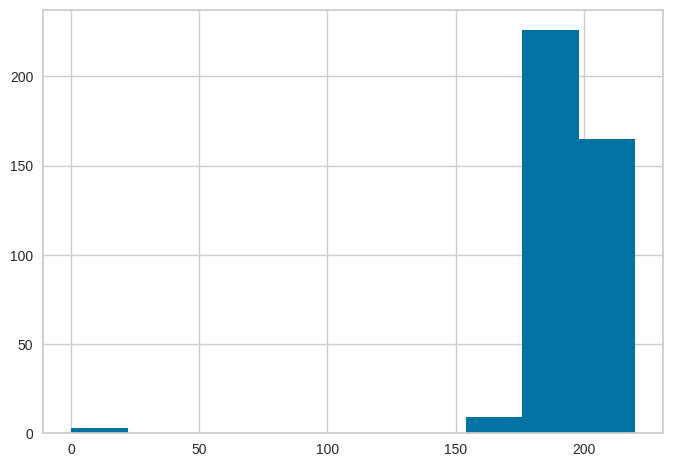

In [14]:
# Cheking Players Heights Distribution

players['Height'].hist()

In [15]:
players_df =  players[players['Height'] > 0]['Height']

<Axes: >

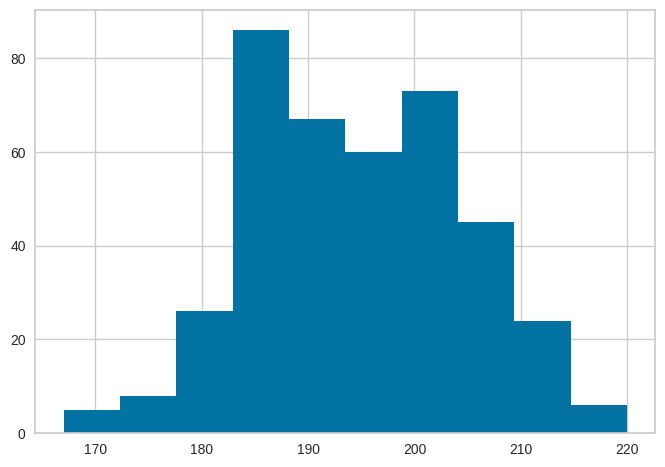

In [16]:
players_df.hist()

In [17]:
players_df.describe()

count    400.000000
mean     194.612500
std        9.899614
min      167.000000
25%      187.000000
50%      194.000000
75%      202.250000
max      220.000000
Name: Height, dtype: float64

In [18]:
players.groupby('POS').count()['Id']

POS
C      78
PF     98
PG    133
SF     33
SG     61
Name: Id, dtype: int64

<Axes: xlabel='POS'>

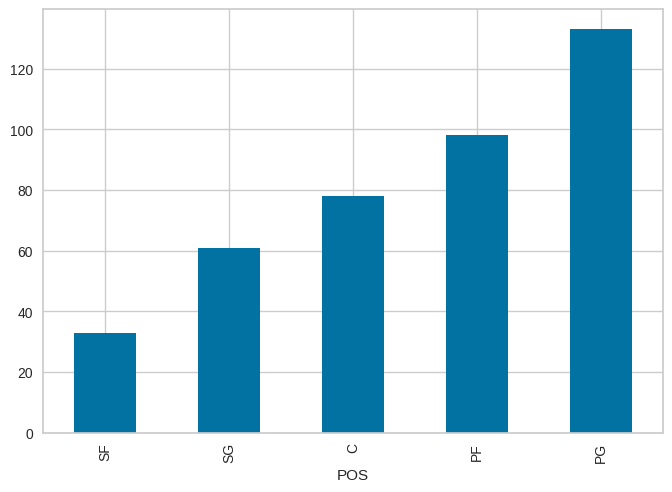

In [19]:
players.groupby('POS').count()['Player Name'].sort_values().plot.bar()

Section 3: Data Preparation

In [20]:
# Averaging Duplicated rows in the dataset

grouped = game_stats.groupby('Id').mean().round(2)
grouped.head()

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,2PA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
Id,,,,,,,,,,,,,,,,,,,,,
P_142950,4.26,1.00,0.00,1.0,0.00,0.0,0.50,0.00,0.00,0.50,...,36.54,0.00,16.66,50.00,0.00,0.00,0.00,0.00,2.94,8.02
P_142957,27.31,14.75,5.25,12.0,45.00,0.0,1.25,0.00,5.25,10.75,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
P_152307,21.77,8.00,3.00,10.0,30.00,0.0,4.00,0.00,3.00,6.00,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
P_152309,33.63,12.25,5.00,9.0,53.45,0.5,1.00,25.00,4.50,8.00,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
P_152335,23.79,7.50,3.00,9.0,34.86,1.0,4.50,39.38,2.00,4.50,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42


In [ ]:
grouped.shape


(403, 44)

In [22]:
# Merging the two Dataset

data = pd.merge(players, grouped ,on= 'Id')

In [23]:
data.head()

,Id,SN,Player Name,POS,Height,Nationality,MIN,PTS,FGM,FGA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_142950,7,Aren Davoudichegani,PG,186,IRI,4.26,1.00,0.00,1.0,...,36.54,0.00,16.66,50.00,0.00,0.00,0.00,0.00,2.94,8.02
1,P_142957,15,Hamed EHaddadi,C,218,IRI,27.31,14.75,5.25,12.0,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
2,P_152307,22,Nick Fazekas,C,207,JPN,21.77,8.00,3.00,10.0,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
3,P_152309,12,CJ Giles,C,211,BRN,33.63,12.25,5.00,9.0,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
4,P_152335,8,Saeid Davarpanah,SF,190,IRI,23.79,7.50,3.00,9.0,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42


In [24]:
# Dropping unnecessary columns

data.drop(['SN','Height' ,'Nationality'], axis=1, inplace=True)

In [25]:
# Total number of players

data.shape[0]

403

In [26]:
data['MIN'].describe()

count    403.000000
mean      14.743474
std        8.600865
min        0.000000
25%        7.625000
50%       14.860000
75%       20.725000
max       40.000000
Name: MIN, dtype: float64

In [27]:
# Removing players that never played

data = data[data['MIN'] > 0]

In [28]:
# Number of players that played

data.shape[0]

392

In [29]:
data['MIN'].mean()

15.15719387755102

In [30]:
data = data[data['MIN'] > data['MIN'].mean()]

In [31]:
# Number of players that played above average playing time

data.shape[0]

198

In [32]:
data.reset_index(inplace=True, drop=True)

In [33]:
data.head()

,Id,Player Name,POS,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_142957,Hamed EHaddadi,C,27.31,14.75,5.25,12.0,45.00,0.00,1.25,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
1,P_152307,Nick Fazekas,C,21.77,8.00,3.00,10.0,30.00,0.00,4.00,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
2,P_152309,CJ Giles,C,33.63,12.25,5.00,9.0,53.45,0.50,1.00,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
3,P_152335,Saeid Davarpanah,SF,23.79,7.50,3.00,9.0,34.86,1.00,4.50,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42
4,P_156348,Rob Loe,C,21.48,14.25,5.50,11.0,53.41,2.25,5.50,...,134.94,65.62,68.41,8.48,0.23,2.08,0.14,10.86,14.45,21.60


In [34]:
data.columns

Index(['Id', 'Player Name', 'POS', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', '2PM', '2PA', '2P%', 'FTM', 'FTA', 'FT%', 'DR', 'OR',
       'TR', 'AST', 'TO', 'STL', 'BLK', 'TPF', 'TPFD', 'TSFD', 'MidRangePTS',
       'MidRangeM', 'MidRangeA', 'MidRange%', 'PaintPTS', 'PaintM', 'PaintA',
       'Paint%', 'Floor%', 'DRtg', 'ORtg', 'eFG%', 'TS%', 'FT Rate',
       'AST Rate', 'AST/TO', 'TOV Rate', 'ORB%', 'DRB%', 'USG%'],
      dtype='object')

In [35]:
features = ['PTS' , 'FGM' , 'FGA' , 'FG%' , '3PM' , '3PA' , '3P%' , '2PM' , '2PA' , '2P%' , 'DR' , 'OR' , 'TR' , 'AST' , 'TO' , 'STL' , 'BLK' , 'TPF' , 'TPFD' , 'TSFD' , 'MidRangePTS' ,
'MidRangeM' , 'MidRangeA' , 'MidRange%' , 'PaintPTS' , 'PaintM' , 'PaintA' , 'Paint%' , 'Floor%' , 'DRtg' , 'ORtg' , 'eFG%' , 'TS%' , 'FT Rate' ,
'AST Rate' , 'AST/TO' , 'TOV Rate' , 'ORB%' , 'DRB%' , 'USG%']

In [36]:
 x = data.loc[:, features].values
 # Normalizing Data
 x = StandardScaler().fit_transform(x)

In [37]:
round(np.mean(x)), np.std(x)

(0, 1.0)

In [38]:
pca_list = []

for n_components in range(2,21):
  pca = PCA(n_components = n_components)
  pca.fit_transform(x)
  pca_variance = sum(pca.explained_variance_ratio_)
  pca_list.append(pca_variance)
  print(f"for n_components = {n_components}, explained variance ratio is {pca_variance}")

for n_components = 2, explained variance ratio is 0.45752518256664376
for n_components = 3, explained variance ratio is 0.575830862302107
for n_components = 4, explained variance ratio is 0.6451767484666219
for n_components = 5, explained variance ratio is 0.7020877006967218
for n_components = 6, explained variance ratio is 0.7494772094012302
for n_components = 7, explained variance ratio is 0.7901486527769187
for n_components = 8, explained variance ratio is 0.8237221331119855
for n_components = 9, explained variance ratio is 0.8514225454039887
for n_components = 10, explained variance ratio is 0.8745253376854251
for n_components = 11, explained variance ratio is 0.8951208098576844
for n_components = 12, explained variance ratio is 0.9127624701960418
for n_components = 13, explained variance ratio is 0.926779858597685
for n_components = 14, explained variance ratio is 0.9392522506575358
for n_components = 15, explained variance ratio is 0.9500490975222833
for n_components = 16, explai

Text(0.5, 0.98, 'Finding the right number of components')

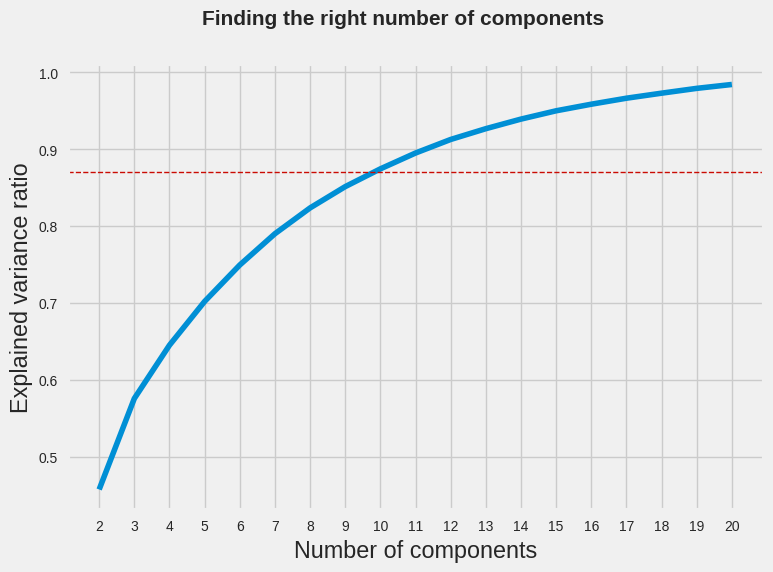

In [39]:
plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2,21), pca_list)

ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance ratio')

ax.set_xticks(np.arange(2,21,1))

ax.axhline(.87, c='r', linestyle='--', linewidth=1)

pca_fig.suptitle("Finding the right number of components", weight = 'bold',size = 15 )

Text(0.5, 0.98, 'Finding the right number of components')

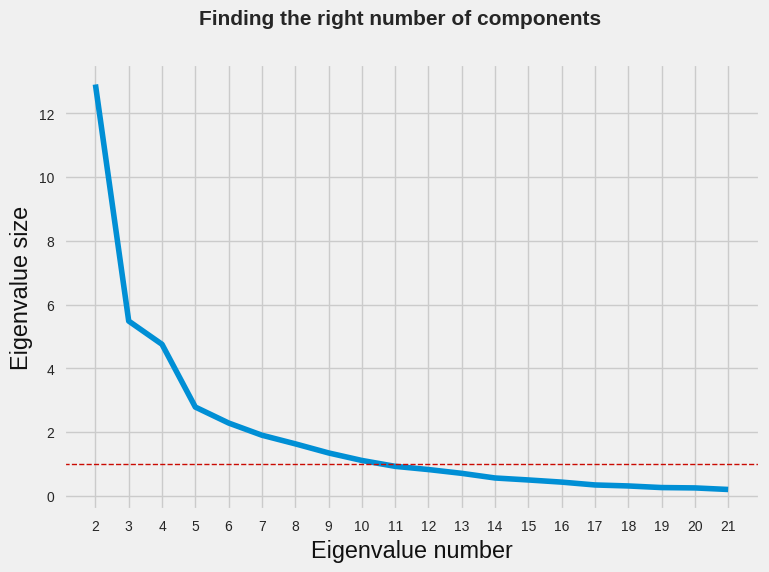

In [42]:
plt.style.use('fivethirtyeight')

pca_deriv, ax = plt.subplots()

ax.plot(range(2, 22), pca.explained_variance_)

ax.set_xlabel('Eigenvalue number', c='k')
ax.set_ylabel('Eigenvalue size' , c='k')

ax.set_xticks(np.arange(2, 22, 1))

ax.axhline(1, c='r' , linestyle= '--' , linewidth=1)

pca_deriv.suptitle("Finding the right number of components", weight = 'bold', size = 15)

In [43]:
n = 10
cols = [f"pc {x + 1}"for x in range (n)]
pca = PCA(n_components = n)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = cols)

pca_df['Player'] = data['Player Name']
pca_df = pca_df[['Player'] + cols]

In [44]:
pca_df.head()

,Player,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10
0,Hamed EHaddadi,9.106824,-3.373552,-3.653198,-2.084274,2.697881,0.761018,-1.419287,0.639695,0.440735,0.407775
1,Nick Fazekas,2.335395,-1.653896,-1.162944,0.173510,2.568430,1.846178,2.727008,-0.208963,4.926070,1.007183
2,CJ Giles,4.954808,-0.564874,-2.207142,0.510476,-0.475233,-0.204888,-1.321230,-1.403800,0.643987,-1.200215
3,Saeid Davarpanah,-1.004321,3.390428,-0.088499,2.193451,1.778222,-0.048037,0.322336,-1.319926,0.227834,1.911956
4,Rob Loe,4.780067,-0.390613,1.943499,-2.647271,-1.258506,2.594739,-0.164980,-1.965861,-1.321196,0.032433


In [45]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.32105959 0.13646559 0.11830568 0.06934589 0.05691095 0.04738951
 0.04067144 0.03357348 0.02770041 0.02310279]
0.8745253376854251


Section 4: Data Modeling


what Algoritm should?

Checking the Silhouette Score for optimal number of clusters

In [46]:
x = pca_df[pca_df.columns.values[1:]].to_numpy()
x

array([[ 9.1068244 , -3.37355222, -3.6531977 , ...,  0.63969478,
         0.44073489,  0.40777545],
       [ 2.33539513, -1.6538962 , -1.16294396, ..., -0.20896309,
         4.92607012,  1.00718285],
       [ 4.95480833, -0.56487359, -2.20714215, ..., -1.40380005,
         0.64398674, -1.20021458],
       ...,
       [-3.04701913, -1.44611942, -0.43825895, ..., -0.7348781 ,
         0.55295525, -1.3772305 ],
       [-4.52291326, -0.89629052, -2.07080865, ...,  0.52393291,
        -1.23877098, -0.90656538],
       [ 9.05376112,  2.2417166 ,  0.96916638, ..., -1.64199612,
         0.52914987, -1.24056365]])

In [47]:
x = pca_df[pca_df.columns.values[1:]].to_numpy()

silhouette = []


for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99, n_init=10)
    cluster_labels = kmeans.fit_predict(x)

    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.2642713275900516
For n_clusters = 3, silhouette score is 0.1493870467846272
For n_clusters = 4, silhouette score is 0.1492318265394085
For n_clusters = 5, silhouette score is 0.1488206782355402
For n_clusters = 6, silhouette score is 0.13201861884922
For n_clusters = 7, silhouette score is 0.13926766422220588
For n_clusters = 8, silhouette score is 0.13219999032125004
For n_clusters = 9, silhouette score is 0.11675376674421603
For n_clusters = 10, silhouette score is 0.13076847236113673
For n_clusters = 11, silhouette score is 0.12715558457048548
For n_clusters = 12, silhouette score is 0.1160823741039605
For n_clusters = 13, silhouette score is 0.12460758614294654
For n_clusters = 14, silhouette score is 0.11687619715523793
For n_clusters = 15, silhouette score is 0.12063268246286138
For n_clusters = 16, silhouette score is 0.12273540299662236
For n_clusters = 17, silhouette score is 0.11970859241006412
For n_clusters = 18, silhouette score is

Text(0.5, 0.98, 'Finding the right number of clusters')

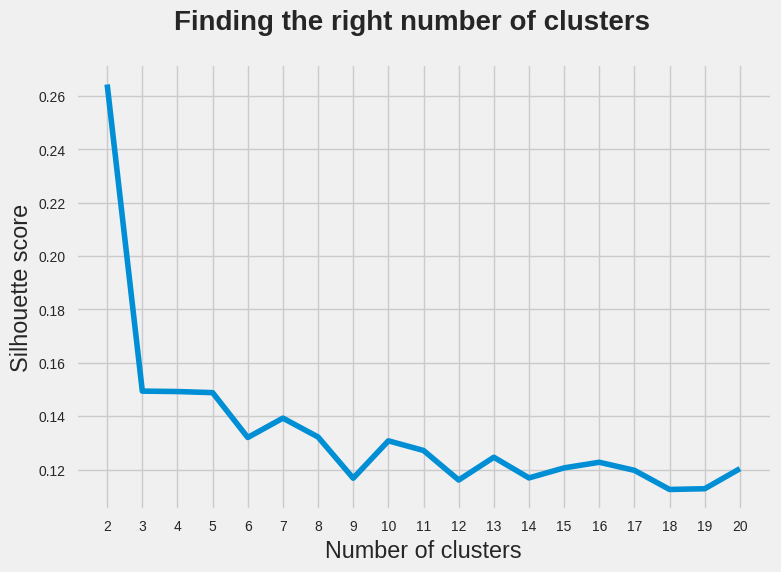

In [48]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,21), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 1))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 20)

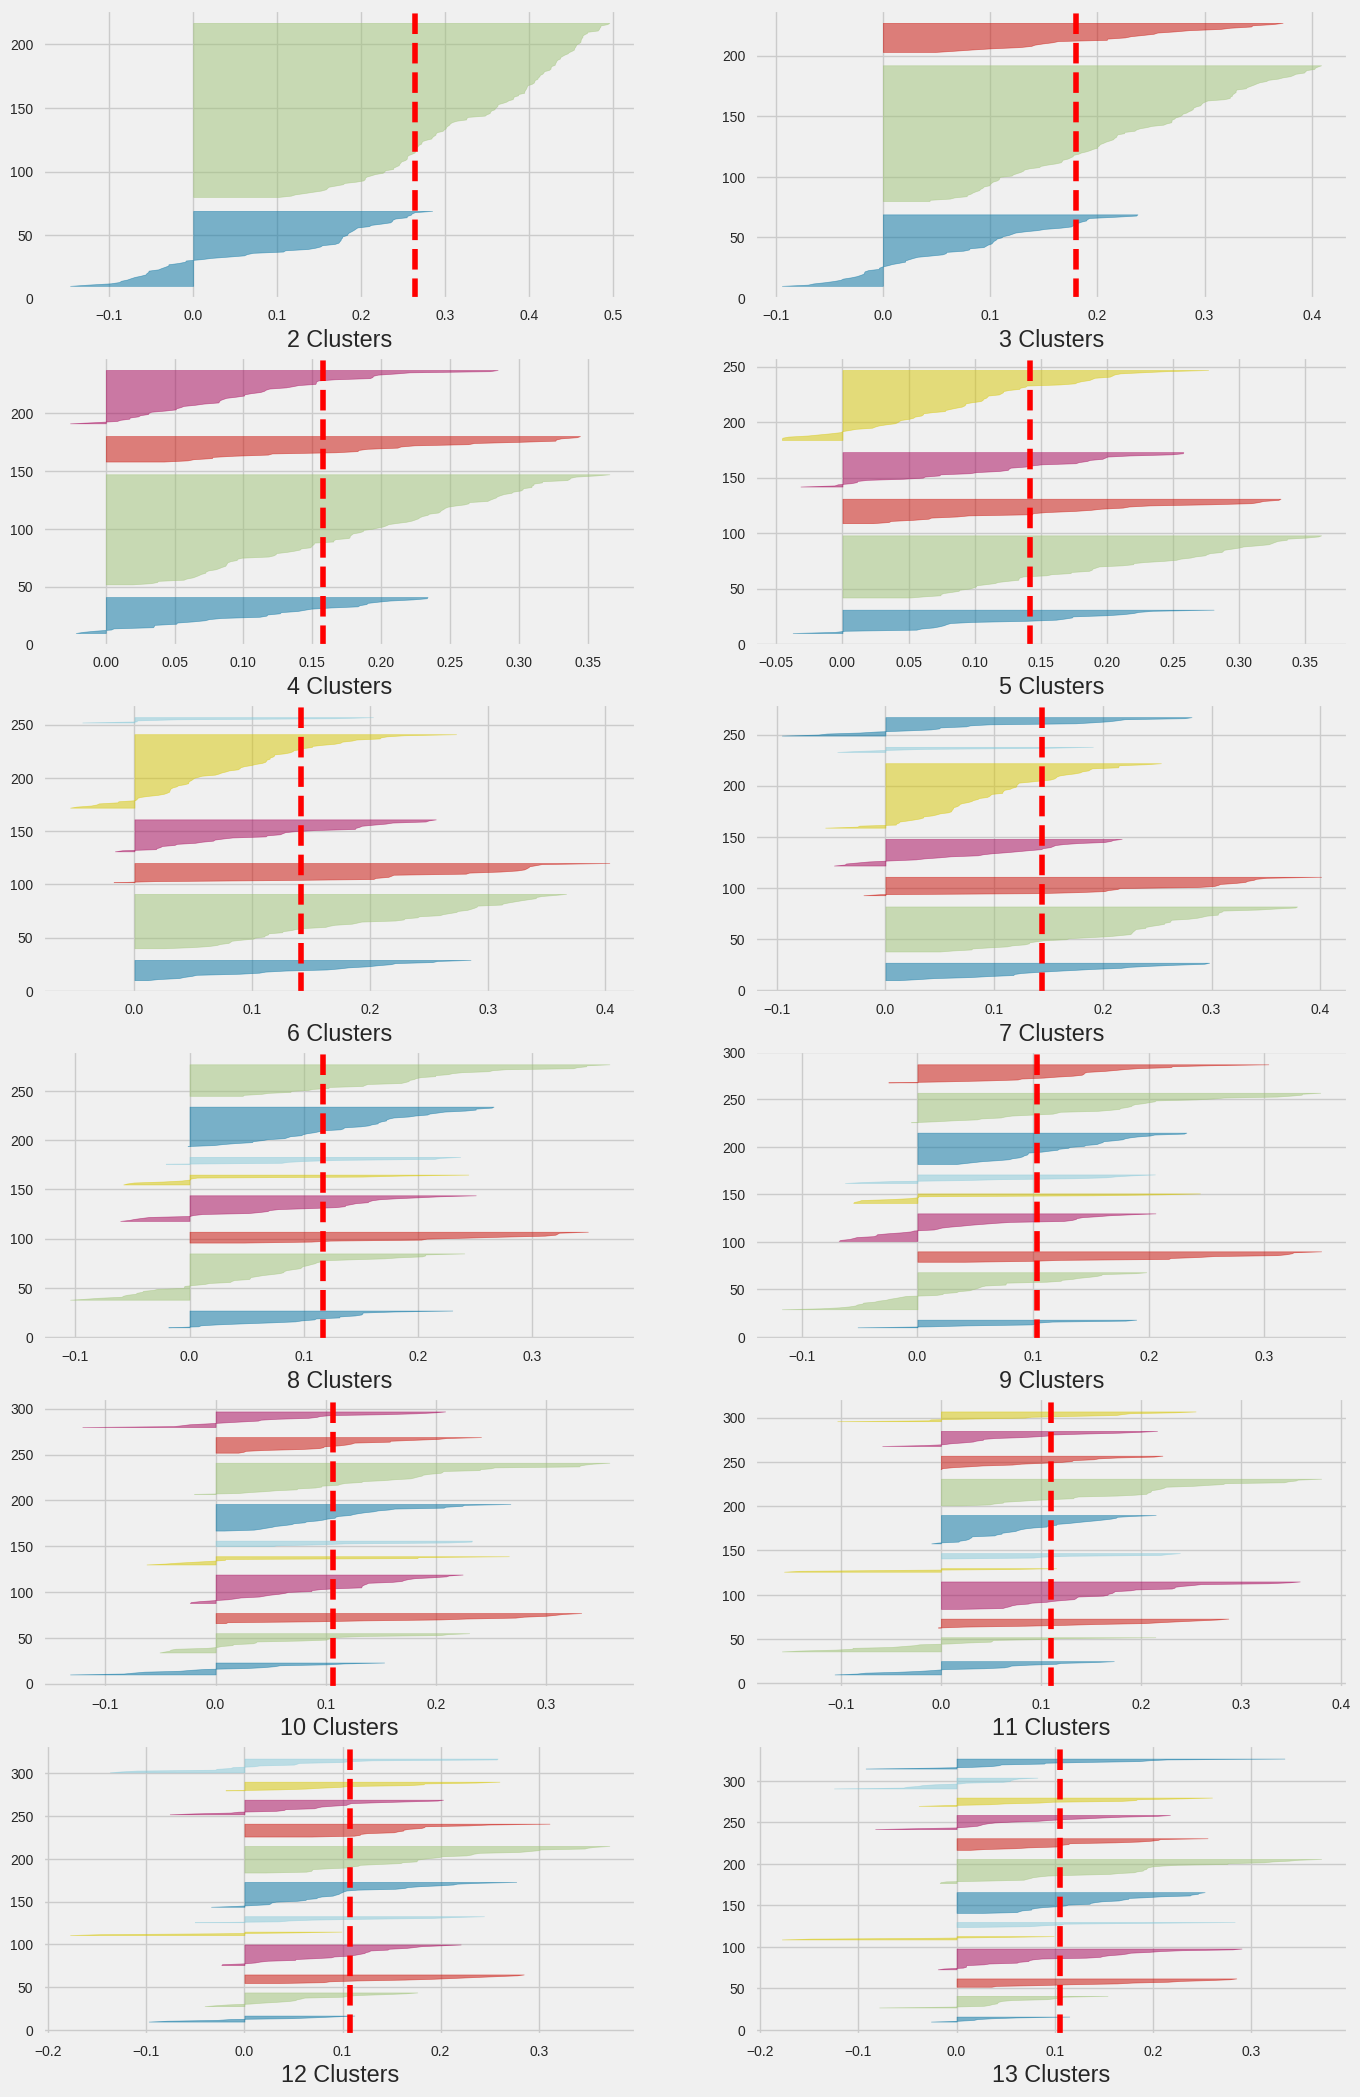

In [49]:
fig, ax = plt.subplots(6, 2, figsize=(15,25))
for i in [2, 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13]:


    km = KMeans(n_clusters=i, n_init='auto', random_state=42, max_iter=300)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    visualizer.ax.set_xlabel(f"{i} Clusters")





In [50]:
kmeans = KMeans(n_clusters = 6, random_state = 99, n_init=10)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [51]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = data['Player Name']
df_cluster['POS'] = data['POS']
df_cluster['Clusters'] = y_kmeans

df_cluster.head()

,Player,POS,Clusters
0,Hamed EHaddadi,C,4
1,Nick Fazekas,C,2
2,CJ Giles,C,4
3,Saeid Davarpanah,SF,2
4,Rob Loe,C,4


In [55]:
df_cluster['Clusters'] = df_cluster['Clusters'] + 1

In [56]:
interest_stats = ['PTS', 'eFG%', 'TS%', '3PA', '3P%', 'PaintPTS', 'PaintA', 'MidRangePTS', 'MidRangeA', 'Floor%' , 'DRtg' , 'ORtg' , 'USG%' ,
                'FT Rate' , 'TSFD' , 'TPFD' , 'AST/TO', 'AST Rate' , 'TOV Rate', 'ORB%' , 'DRB%' , 'TR' , 'STL' , 'BLK' , 'AST' ]

In [57]:
df_cluster[df_cluster['Clusters'] == 6]

,Player,POS,Clusters
0,Hamed EHaddadi,C,6
2,CJ Giles,C,6
4,Rob Loe,C,6
14,Arsalan Kazemi,PF,6
22,Ahmad Al Dwairi,C,6
27,Zhelin Wang,C,6
34,Isaac Fotu,PF,6
36,Devon Dwayne Chism,PF,6
37,Ater Majok,C,6
43,Ali Haidar,C,6


In [58]:
df_cluster[interest_stats] = data[interest_stats]

In [59]:
df_cluster

,Player,POS,Clusters,PTS,eFG%,TS%,3PA,3P%,PaintPTS,PaintA,...,TPFD,AST/TO,AST Rate,TOV Rate,ORB%,DRB%,TR,STL,BLK,AST
0,Hamed EHaddadi,C,6,14.75,6.25,55.07,1.25,0.00,10.00,9.00,...,6.50,1.60,0.25,0.22,9.18,20.90,11.50,1.25,2.25,3.50
1,Nick Fazekas,C,4,8.00,0.00,36.36,4.00,0.00,6.00,5.00,...,2.00,2.00,0.19,0.09,0.00,17.78,8.00,3.00,1.00,2.00
2,CJ Giles,C,6,12.25,33.33,60.81,1.00,25.00,7.50,5.25,...,3.00,1.19,0.16,0.21,3.55,26.18,8.75,0.75,0.50,1.75
3,Saeid Davarpanah,SF,4,7.50,37.20,42.54,4.50,39.38,2.00,1.75,...,0.75,2.50,0.37,0.18,2.46,2.30,1.50,2.25,0.00,3.50
4,Rob Loe,C,6,14.25,65.62,68.41,5.50,43.75,6.50,5.50,...,2.50,2.08,0.23,0.14,10.86,14.45,9.00,0.50,0.25,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Rhenz Joseph Abando,SG,2,6.50,41.66,46.43,3.00,25.00,2.00,2.00,...,2.00,0.00,0.00,0.23,0.00,0.00,0.00,0.50,0.50,0.00
194,Junlong Zhu,PG,5,5.44,34.26,57.31,1.56,27.78,2.44,1.44,...,1.33,0.56,0.15,0.09,2.19,8.19,3.67,0.33,0.11,0.56
195,Isshak Oubeid,PG,2,3.00,0.00,25.00,1.50,0.00,3.00,2.50,...,2.00,2.50,0.72,0.26,0.00,10.11,3.50,2.00,0.00,4.00
196,I Ping Wu,C,2,4.33,22.50,33.33,2.33,19.44,2.00,1.00,...,3.67,0.33,0.23,0.24,1.77,4.69,2.00,0.00,0.33,0.33


In [60]:
df_cluster.to_csv('clustered-AsianQualifiers.csv' , index=False)

In [61]:
roles = ['????' , 'All Stars' , 'Elite Bigs' , 'Backups' , 'Shooters' , 'Superstars']

cluster_dict = dict(zip(list(range(1,7)), roles))
cluster_dict

{1: '????',
 2: 'All Stars',
 3: 'Elite Bigs',
 4: 'Backups',
 5: 'Shooters',
 6: 'Superstars'}

In [62]:
df_cluster['Role'] = df_cluster['Clusters'].map(cluster_dict)

In [63]:
df_avg = df_cluster.groupby('Role')[interest_stats].mean()

In [64]:
df_avg

,PTS,eFG%,TS%,3PA,3P%,PaintPTS,PaintA,MidRangePTS,MidRangeA,Floor%,...,TPFD,AST/TO,AST Rate,TOV Rate,ORB%,DRB%,TR,STL,BLK,AST
Role,,,,,,,,,,,,,,,,,,,,,
All Stars,4.856667,30.775098,36.889608,3.082941,21.894902,1.443725,1.740392,0.283333,0.589020,30.648824,...,1.173529,1.029412,0.244118,0.206275,1.576078,5.077843,2.362353,0.692157,0.171569,1.385882
Backups,10.122826,37.031522,46.852826,4.308043,25.101087,3.821087,3.993478,0.974130,1.477174,37.597826,...,2.100217,1.118043,0.186304,0.191304,2.024783,7.943913,3.585000,1.056957,0.291522,2.007609
Elite Bigs,12.365000,55.395385,67.503846,3.917692,41.085385,4.405000,3.606538,0.475000,0.599615,55.250000,...,2.473846,2.723462,0.436154,0.151923,3.056538,8.707308,4.286923,1.171923,0.253462,3.538846
Shooters,6.231304,28.012609,52.314348,1.841957,19.452826,3.371087,3.035870,0.257174,0.405870,47.298696,...,1.461522,1.134348,0.324565,0.191739,3.065652,6.962609,3.630435,0.647609,0.258043,1.575217
Superstars,12.567727,19.206364,62.712727,1.454091,14.295909,9.069545,6.904545,0.254545,0.679545,54.536364,...,3.710909,1.312273,0.186818,0.147727,7.517727,16.117273,8.392273,0.710909,1.129545,1.777727


In [65]:
off_metrics = ['USG%' , 'ORtg' , 'DRtg' , 'Floor%']


<Axes: xlabel='Role'>

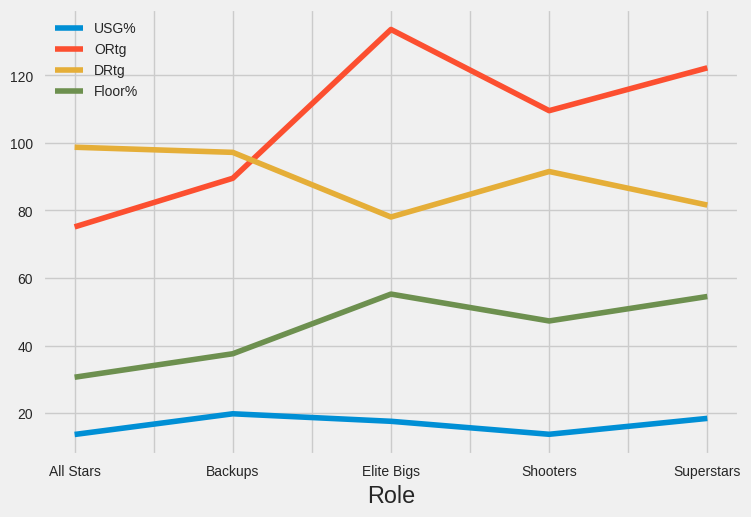

In [66]:
df_avg[off_metrics].plot.line()

In [67]:
df_avg[['USG%' , 'ORtg']].sort_values(by=['USG%' ,'ORtg'], ascending=False)

,USG%,ORtg
Role,,
Backups,19.830000,89.528478
Superstars,18.468182,122.198182
Elite Bigs,17.606923,133.556538
Shooters,13.764130,109.529783
All Stars,13.707451,75.135294


In [68]:
df_avg['DRtg'].mean()

89.41538949797007

In [69]:
df_avg['Floor%'].sort_values(ascending=False)

Role
Elite Bigs    55.250000
Superstars    54.536364
Shooters      47.298696
Backups       37.597826
All Stars     30.648824
Name: Floor%, dtype: float64

In [70]:
df_avg['eFG%'].sort_values(ascending=False)

Role
Elite Bigs    55.395385
Backups       37.031522
All Stars     30.775098
Shooters      28.012609
Superstars    19.206364
Name: eFG%, dtype: float64

In [71]:
df_avg['TS%'].sort_values(ascending=False)

Role
Elite Bigs    67.503846
Superstars    62.712727
Shooters      52.314348
Backups       46.852826
All Stars     36.889608
Name: TS%, dtype: float64

In [72]:
df_avg['FT Rate'].sort_values(ascending=False)

Role
Elite Bigs    30.416154
Superstars    27.591818
Shooters      27.138043
Backups       16.118478
All Stars      8.703922
Name: FT Rate, dtype: float64

<Axes: xlabel='Role'>

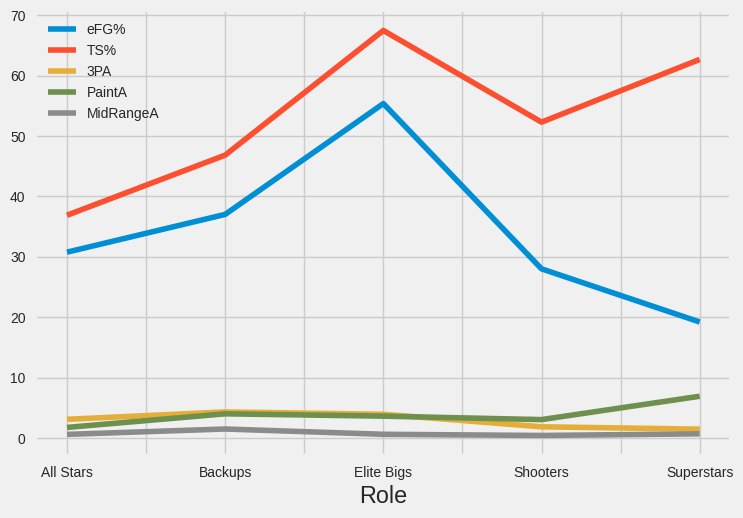

In [73]:
shooting_metrics = ['eFG%', 'TS%' ,'3PA' , 'PaintA', 'MidRangeA']
df_avg[shooting_metrics].plot.line()

<Axes: xlabel='Role'>

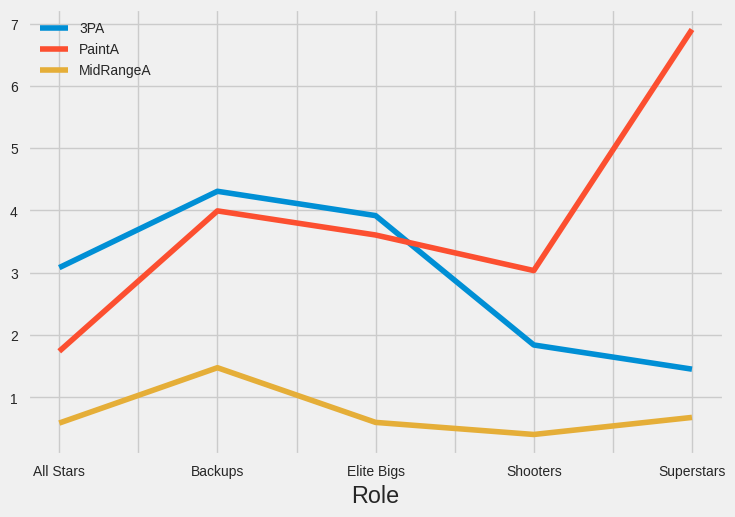

In [74]:
shooting_metrics = ['3PA' , 'PaintA' , 'MidRangeA']
df_avg[shooting_metrics].plot.line()

<Axes: xlabel='Role'>

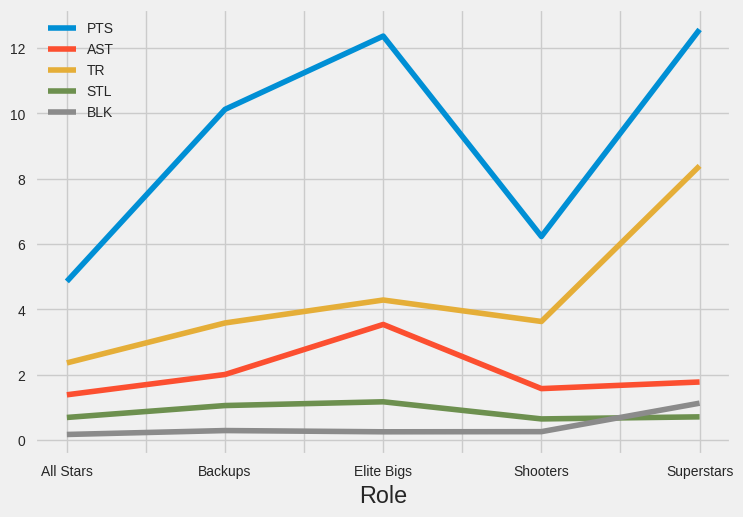

In [75]:
primary_metrics = ['PTS' , 'AST' , 'TR' , 'STL' , 'BLK']
df_avg[primary_metrics].plot.line()

In [76]:
df_avg['ORB%'].sort_values(ascending=False)

Role
Superstars    7.517727
Shooters      3.065652
Elite Bigs    3.056538
Backups       2.024783
All Stars     1.576078
Name: ORB%, dtype: float64

<Axes: xlabel='Role'>

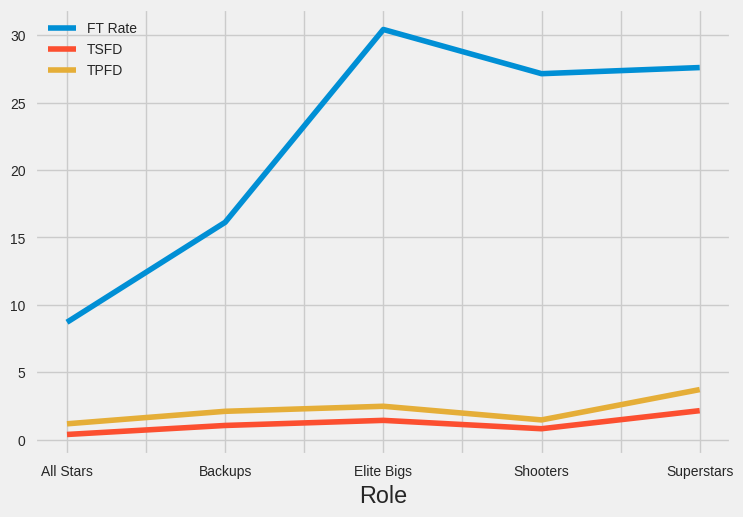

In [77]:
fouling_metrics = ['FT Rate', 'TSFD', 'TPFD']
df_avg[fouling_metrics].plot.line()

In [78]:
df_avg[['FT Rate' , 'TPFD', 'TSFD']].sort_values(by=['FT Rate', 'TPFD' , 'TSFD'], ascending=False)

,FT Rate,TPFD,TSFD
Role,,,
Elite Bigs,30.416154,2.473846,1.428462
Superstars,27.591818,3.710909,2.147727
Shooters,27.138043,1.461522,0.808261
Backups,16.118478,2.100217,1.050435
All Stars,8.703922,1.173529,0.382157


<Axes: xlabel='Role'>

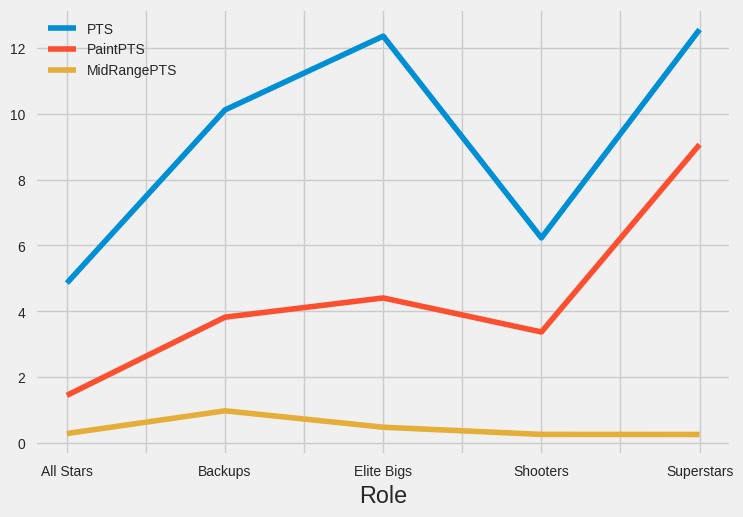

In [79]:
pts_metrics = ['PTS' , 'PaintPTS' , 'MidRangePTS']
df_avg[pts_metrics].plot.line()

<Axes: xlabel='Role'>

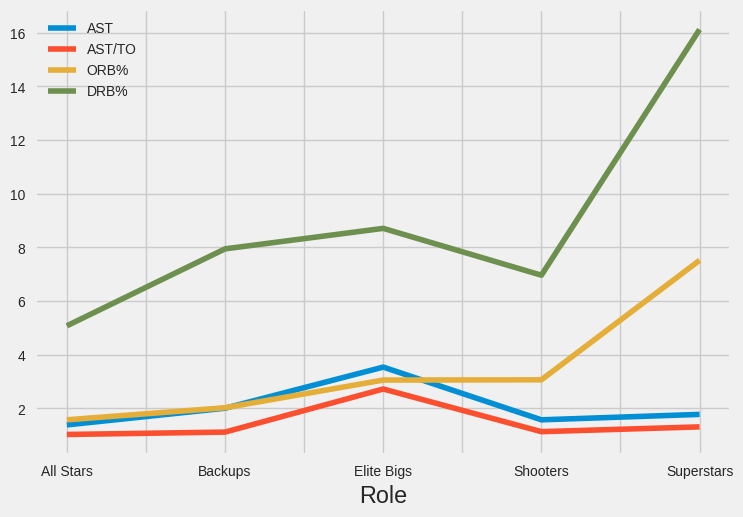

In [80]:
other_metrics = ['AST', 'AST/TO' , 'ORB%' , 'DRB%']
df_avg[other_metrics].plot.line()

In [81]:
df_cluster.groupby('Role').count()['Player']

Role
All Stars     51
Backups       46
Elite Bigs    26
Shooters      46
Superstars    22
Name: Player, dtype: int64